In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , root_mean_squared_error

In [94]:
df = pd.read_csv('Student_Performance.csv')
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [95]:
print(df.isnull())

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0             False            False                       False        False   
1             False            False                       False        False   
2             False            False                       False        False   
3             False            False                       False        False   
4             False            False                       False        False   
...             ...              ...                         ...          ...   
9995          False            False                       False        False   
9996          False            False                       False        False   
9997          False            False                       False        False   
9998          False            False                       False        False   
9999          False            False                       False        False   

      Sample Question Paper

In [96]:

df['Extracurricular Activities'] = pd.get_dummies(df['Extracurricular Activities'],drop_first=True).astype(int)
print(df.head())



   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [97]:
X = df.drop('Performance Index',axis=1)
y = df['Performance Index']

In [98]:
X_train , X_test , y_train , y_test  = train_test_split(X,y,train_size=0.7,random_state=43)


In [99]:
l = LinearRegression()
l.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred = l.predict(X_test)

In [101]:

error = mean_absolute_percentage_error(y_pred,y_test)
print(error)

0.033624460482926395


In [102]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9884440672186301


In [104]:
print(l.coef_)

[2.86777987 1.0189088  0.58826339 0.47767586 0.20576988]


In [105]:
print(l.intercept_)

-34.202215513988506


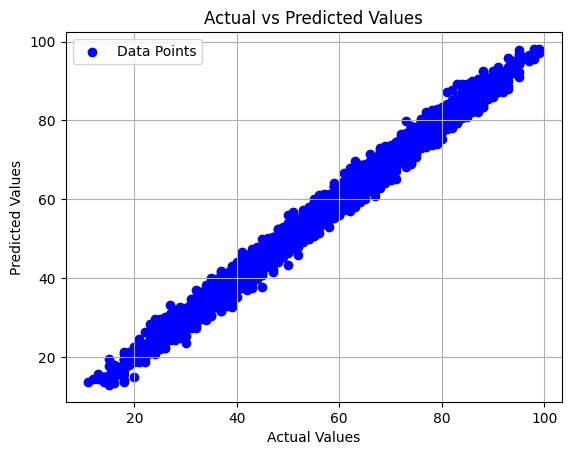

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, color='blue', label='Data Points')

plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()
